# ARM Open-Science Basics with CRG

<table>
    <tr>
        <td>
            <img src="https://www.arm.gov/wp-content/uploads/54251180546_1125c8161e_c-768x577.jpg" style="height: 300px;" alt="CRG Campaign"></img>
        </td>
        <td>
            <h1>Atmospheric Radiation Measurement user facility (ARM)</h1>
            <h1>Coast-Urban-Rural Atmospheric Gradient Experiment(CRG)</h1>
            Notebook covering the basics of ARM open-science resources (hardware and software) with a focus on CRG data </br>
            Corresponding Author: Adam Theisen (atheisen@anl.gov)
        </td>
    </tr>
</table>

## Overview
The first ARM Mobile Facility (AMF1) is deployed to 3 sites around the Baltimore, MD region beginning December 1, 2024.  As the name implies, the 3 sites cover coastal (supplemental site S3), urban (main site M1), and rural (supplemental site S2).  The rural site (S2) also houses the aerosol oberving system.  This tutorial will help users with the basics of ACT using the CRG data from multiple sites and look at some specialized visualizations.

1. Intro to ACT
1. Instrument Overview
1. Downloading and Reading in Data
1. Quality Controlling Data
1. Visualizing Data

## Prerequisites
This notebook will rely heavily on Python, [Atmospheric data Community Toolkit (ACT)](https://github.com/ARM-DOE/ACT), and the [Python-ARM Radar Toolkit](https://github.com/ARM-DOE/pyart).  Don't worry if you don't have experience with either, this notebook will walk you though what you need to know.

You will also need an account and token to download data using the ARM Live webservice.  Navigate to the [webservice information page](https://adc.arm.gov/armlive/) and log in to get your token.  Your account username will be your ARM username.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [ACT](https://github.com/ARM-DOE/ACT) | Helpful | |
| [Py-ART](https://github.com/ARM-DOE/pyart) | Helpful |

- **Time to learn**: 15 Minutes
- **System requirements**:
    - Python 3.11 or latest
    - ACT v2.0.0 or latest
    - Py-ART 2.02 (Bug fixes submitted as PR)
    - numpy
    - xarray
    - matplotlib

---

## ARM Computational Resources

The ARM Data Center (ADC) provides a variety of tools and resources for working with ARM data.  These include

### ARM Data Workbench
The [ARM data workbench](https://workbench.arm.gov/) provides users with an ecosystem for interacting with ARM data including data discovery, staging, visualization, and publishing.

### ARM JupyterHub
ARM hosts a [JupyterHub](https://jupyterhub.arm.gov/) instance to provide scalable computing infrastructure to support analysis through Jupyter Notebook-based computational environments.

### Cumulus Cluster
ARM's Cumulus cluster provides over 16,000 cores and is available to users with an active ARM account and an [approved request](https://www.arm.gov/capabilities/computing-resources/hpc-request) to use it.  This involes submitting a proposal to ARM.

---

## ARM GitHub Organizations

### ARM-DOE
[ARM-DOE](https://github.com/ARM-DOE) houses ARM-supported software and community code for public use.  Code repositories are expected to be actively maintained and available to the scientific community.

### ARM-Synergy
[ARM-Synergy](https://github.com/ARM-Synergy) is where ARM and ASR principle investigators can host open-source software and community code.  Requests can be submitted through the Contact Us or Help links on [ARM's website](https://arm.gov/).

### ARM-Development
[ARM-Development](https://github.com/ARM-Development) contains ARM infrastructure open-source software and community code that is in a state of development below public promotion and is used to test new ideas.

---

## ARM's Open-Source Software
### Intro to ACT
           
The [Atmospheric data Community Toolkit (ACT)](https://github.com/ARM-DOE/ACT) is an open-source Python toolkit for exploring and analyzing atmospheric time-series datasets.  Examples can be found in the [ACT Example Gallery](https://arm-doe.github.io/ACT/source/auto_examples/index.html).  The toolkit has modules for many different parts of the scientific process, including:

<table>
    <tr>
        <td>
            
#### Data Discovery (act.discovery)
The [discovery](https://arm-doe.github.io/ACT/API/generated/act.discovery.html) module houses functions to download or access data from different groups.  Currently it includes function to get data for ARM, NOAA, EPA, NEON, and more!

#### Input/Output (act.io)
[io](https://arm-doe.github.io/ACT/API/generated/act.io.html) contains functions for reading and writing data from various sources and formats.

#### Visualization (act.plotting)
[plotting](https://arm-doe.github.io/ACT/API/generated/act.plotting.html) contains various routines, built on matplotlib, to help visualize and explore data.  These include 
1. Time-series plots
1. Distribution plots like histograms and heatmaps
1. Geographic plots for moving systems like radiosondes or aircraft
1. Skew-T plots for radiosonde data, built off MetPy
1. Wind rose plots for wind and data roses
1. Cross-section plots for working with 3-dimensional data

#### Corrections (act.corrections)
[corrections](https://arm-doe.github.io/ACT/API/generated/act.corrections.html) apply different corrections to data based on need.  A majority of the existing corrections are for lidar data.

#### Quality Control (act.qc)
The [qc](https://arm-doe.github.io/ACT/API/generated/act.qc.html) module has a lot of functions for working with quality control information, apply new tests, or filtering data based on existing tests.  We will explore some of that functionality in this notebook.

#### Retrievals (act.retrievals)
There are many cases in which some additional calculations are necessary to get more value from the instrument data.  The [retrievals](https://arm-doe.github.io/ACT/API/generated/act.retrievals.html) module houses some functions for performing these advanced calculations.  

#### Utilities (act.utils)
The [utils](https://arm-doe.github.io/ACT/API/generated/act.utils.html) module has a lot of general utilities to help with the data.  Some of these include adding in a solar variable to indicate day/night (useful in filtering data), unit conversions, decoding WMO weather codes, performing weighted averaging, etc...
        </td>
        <td>
            <center>
            <img src="https://arm-doe.github.io/ACT/_images/sphx_glr_plot_neon_001.png" alt="NEON-ARM"></img>
            <figcaption>ARM and NEON data from Utquivaik, AK</figcaption>
            <img src="https://arm-doe.github.io/ACT/_images/sphx_glr_plot_enhanced_skewt_001.png" alt="SONDE"></img>
            <figcaption>Enhanced Skew-T plot from ARM's Southern Great Plains Site (SGP)</figcaption>
            </center>
        </td>
    </tr>
</table>

---

#### Preparing for the Future
Please take the survey to help us develop the third roadmap for ACT which helps to prioritize features and activities in ACT.

<img src="./images/act_roadmap_3_survey.png" style="height: 300px;" alt="ACT Roadmap Survey"></img>

---

### Intro to Py-ART
<table>
    <tr>
        <td style="width:66%; font-size:16px">
The <a href="https://github.com/ARM-DOE/pyart">Python ARM Radar Toolkit</a>, Py-ART, is an open source Python module containing a growing collection of weather radar algorithms and utilities build on top of the Scientific Python stack and distributed under the 3-Clause BSD license.  There are a variety of functions for working with scanning and vertically pointing radar as well such as <a href="https://arm-doe.github.io/pyart/examples/correct/plot_cloud_mask.html#sphx-glr-examples-correct-plot-cloud-mask-py">cloud masks</a>.  Py-ART is used in the creation of many of ARM's scanning precipitation radar value added products.
        </td>
        <td>
            <img src="https://arm-doe.github.io/pyart/_images/sphx_glr_plot_cloud_mask_002.png" alt="Py-ART Cloud Mask" width="300"></img>
            <figcaption>Plot of KAZR reflectivity after applying a cloud mask.</figcaption>
        </td>
    </tr>
</table>

---

## Imports
Let's get started with some data!  But first, we need to import some libraries.

In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

/opt/anaconda3/envs/act_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


## Downloading and Reading ARM's NetCDF Data
ARM's standard file format is NetCDF (network Common Data Form) which makes it very easy to work with in Python!  ARM data are available through a data portal called [Data Discovery](https://adc.arm.gov/discovery/#/) or through a webservice.  If you didn't get your username and token earlier, please go back and see the Prerequisites!

Let's download some of the MET data first!

In [2]:
# Set your username and token here!
username = 'yourUserName'
token = 'yourToken'

# Set the datastream and start/enddates
datastream = 'crgmetM1.b1'
startdate = '2024-12-01'
enddate = '2024-12-11T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_met = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] crgmetM1.b1.20241207.000000.cdf
[DOWNLOADING] crgmetM1.b1.20241201.000000.cdf
[DOWNLOADING] crgmetM1.b1.20241202.000000.cdf
[DOWNLOADING] crgmetM1.b1.20241204.000000.cdf
[DOWNLOADING] crgmetM1.b1.20241203.000000.cdf
[DOWNLOADING] crgmetM1.b1.20241209.000000.cdf
[DOWNLOADING] crgmetM1.b1.20241211.000000.cdf
[DOWNLOADING] crgmetM1.b1.20241210.000000.cdf
[DOWNLOADING] crgmetM1.b1.20241208.000000.cdf
[DOWNLOADING] crgmetM1.b1.20241205.000000.cdf
[DOWNLOADING] crgmetM1.b1.20241206.000000.cdf

If you use these data to prepare a publication, please cite:

Kyrouac, J., Shi, Y., & Tuftedal, M. Surface Meteorological Instrumentation
(MET), 2024-12-01 to 2024-12-11, ARM Mobile Facility (CRG), Baltimore, MD; AMF1
(main site for CoURAGE) (M1). Atmospheric Radiation Measurement (ARM) User
Facility. https://doi.org/10.5439/1786358



### Note: Did you notice the citation and DOI?

In [3]:
# Let's read in the data using ACT and check out the data
ds_met = act.io.read_arm_netcdf(result_met)

## Quality Controlling Data

ARM has multiple methods that it uses to communicate data quality information out to the users.  One of these methods is through "embedded QC" variables.  These are variables within the file that have information on automated tests that have been applied.  Many times, they include Min, Max, and Delta tests but as is the case with the AOS instruments, there can be more complicated tests that are applied.

The results from all these different tests are stored in a single variable using bit-packed QC.  We won't get into the full details here, but it's a way to communicate the results of multiple tests in a single integer value by utilizing binary and bits!  You can learn more about bit-packed QC [here](https://code.arm.gov/docs/QC-flag-examples/-/wikis/home) but ACT also has many of the tools for working with ARM QC.

#### Other Sources of Quality Control
ARM also communicates problems with the data quality through Data Quality Reports (DQR).  These reports are normally submitted by the instrument mentor when there's been a problem with the instrument.  The categories include:

- **Data Quality Report Categories**
    - Missing: Data are not available or set to -9999
    - Suspect: The data are not fully incorrect but there are problems that increases the uncertainty of the values. Data should be used with caution.
    - Bad: The data are incorrect and should not be used.
    - Note: Data notes are a way to communicate information that would be useful to the end user but does not rise to the level of suspect or bad data
    
Additionally, data quality information can be found in the Instrument Handbooks, which are included on most instrument pages.  Here is an [example](https://www.arm.gov/publications/tech_reports/handbooks/met_handbook.pdf) of the MET handbook.

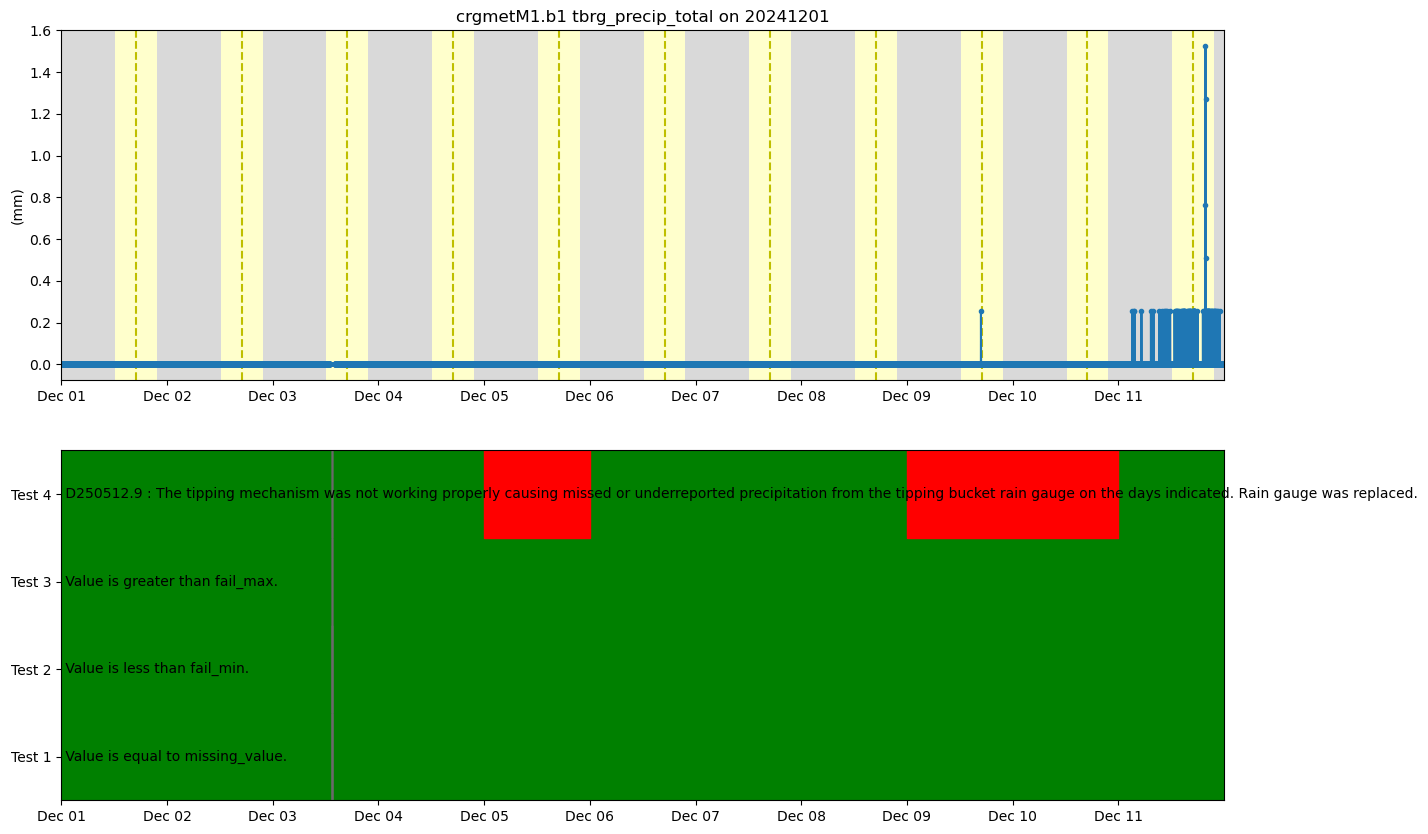

In [4]:
# We can see that there's some missing data in the plot above so let's take a look at the embedded QC!
# First, for many of the ACT QC features, we need to get the dataset more to CF standard and that
# involves cleaning up some of the attributes and ways that ARM has historically handled QC
ds_met.clean.cleanup()

# Query the ARM DQR Webservice
variable = 'tbrg_precip_total'
ds_met = act.qc.add_dqr_to_qc(ds_met, variable=variable)

# Next, let's take a look at visualizing the quality control information
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_met, figsize=(15, 10), subplot_shape=(2,))

# Plot up the variable in the first plot
display.plot(variable, subplot_index=(0,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up the QC variable in the second plot
display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

act.qc.datafilter: Value is equal to missing_value.
 act.qc.datafilter: Value is less than fail_min.
 act.qc.datafilter: Value is greater than fail_max.
 act.qc.datafilter: D250512.9 : The tipping mechanism was not working properly causing missed or underreported precipitation from the tipping bucket rain gauge on the days indicated. Rain gauge was replaced.


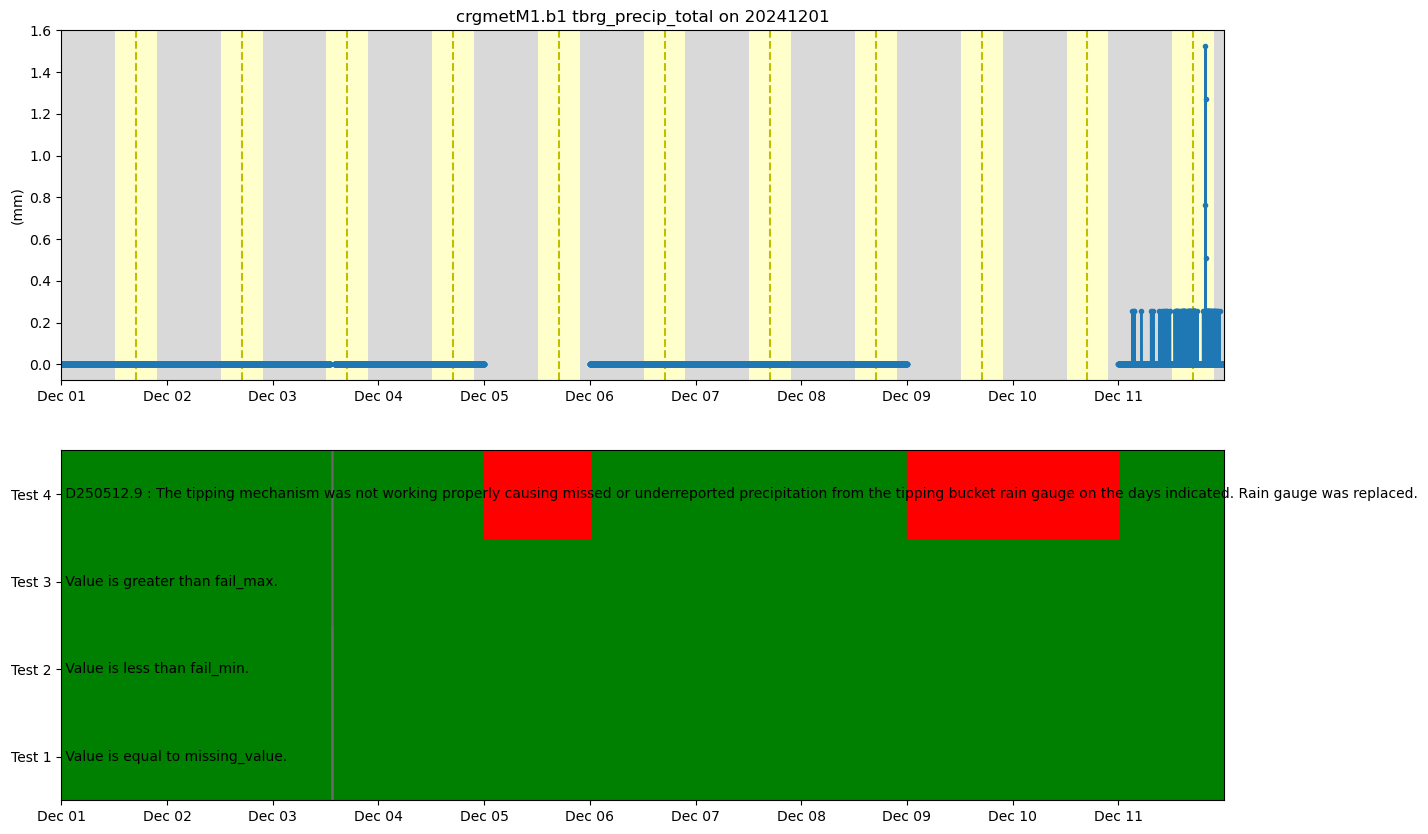

In [5]:
# Now let's work to clean up the data from any incorrect data
ds_met.qcfilter.datafilter(rm_assessments=['Incorrect', 'Suspect'])

# Let's print out the history.  ACT is working on ways to track what has all been
# done to the data while using it in the history attribute
print(ds_met[variable].attrs['history'])


# Next, let's take a look at visualizing the quality control information
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_met, figsize=(15, 10), subplot_shape=(2,))

# Plot up the variable in the first plot
display.plot(variable, subplot_index=(0,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up the QC variable in the second plot
display.qc_flag_block_plot(variable, subplot_index=(1,))
plt.show()

## Visualizing Data
We've already worked with visualizing the data in basic ways but what other options are there in ACT?  This section will show you how to create a variety of different plots.  More plotting examples can be found in [ACT's Documentation](https://arm-doe.github.io/ACT/source/auto_examples/index.html#plotting-examples).

### Multi-Panel Plot
This example shows how to plot the MET and POPS together on a multi-panel plot.  First we need to download the POPS data

In [6]:
# Set the datastream, download, and read in!
datastream = 'crgpops1mM1.b1'
result_pops = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_pops = act.io.read_arm_netcdf(result_pops)

[DOWNLOADING] crgpops1mM1.b1.20241206.000030.nc
[DOWNLOADING] crgpops1mM1.b1.20241208.000030.nc
[DOWNLOADING] crgpops1mM1.b1.20241207.000030.nc
[DOWNLOADING] crgpops1mM1.b1.20241209.000030.nc
[DOWNLOADING] crgpops1mM1.b1.20241203.000030.nc
[DOWNLOADING] crgpops1mM1.b1.20241204.000030.nc
[DOWNLOADING] crgpops1mM1.b1.20241210.000030.nc
[DOWNLOADING] crgpops1mM1.b1.20241202.000030.nc
[DOWNLOADING] crgpops1mM1.b1.20241211.000030.nc
[DOWNLOADING] crgpops1mM1.b1.20241201.000030.nc
[DOWNLOADING] crgpops1mM1.b1.20241205.000030.nc

If you use these data to prepare a publication, please cite:

Petters, S., & Petters, M. portable or printed optical particle spectrometer
(POPS1M), 2024-12-01 to 2024-12-11, ARM Mobile Facility (CRG), Baltimore, MD;
AMF1 (main site for CoURAGE) (M1). Atmospheric Radiation Measurement (ARM) User
Facility.



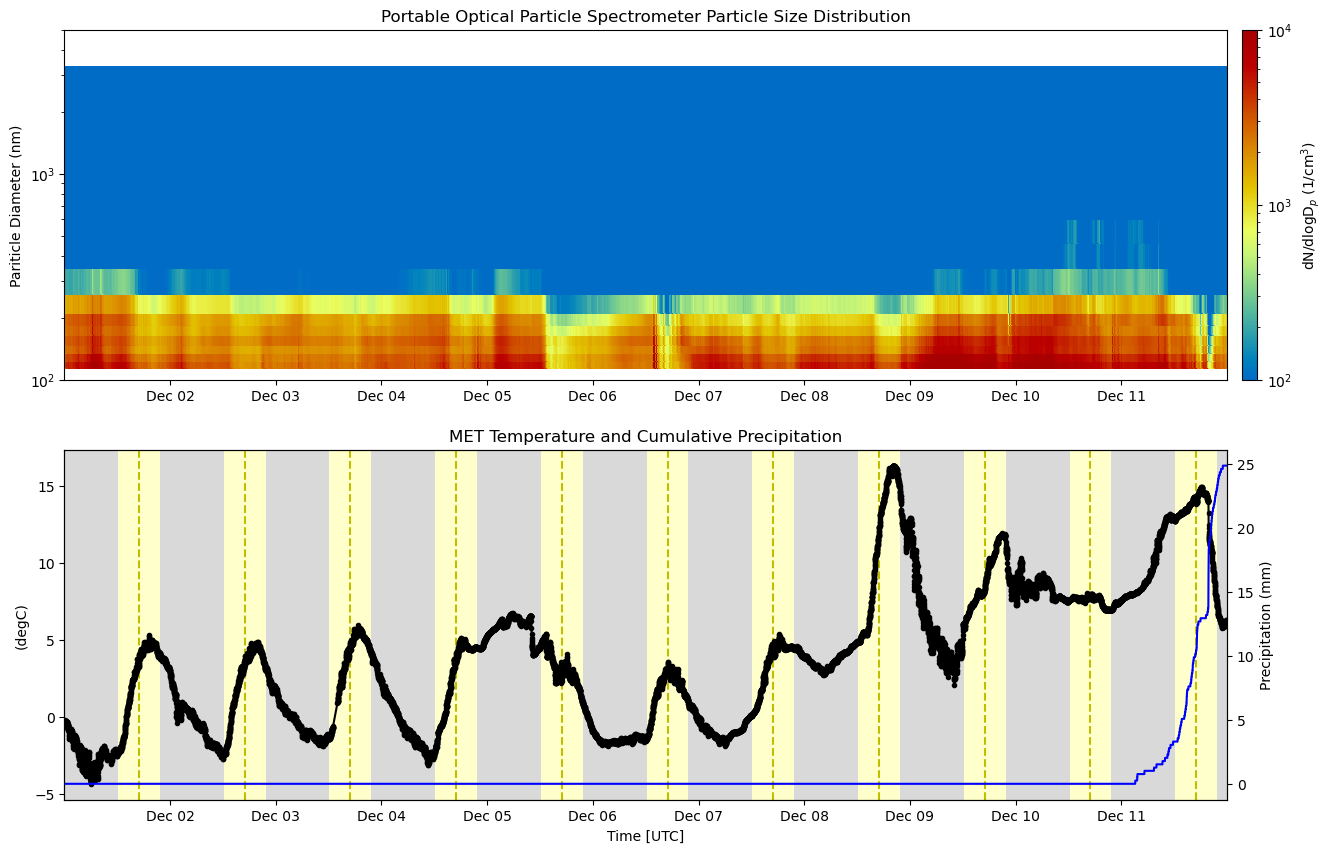

In [7]:
# And plot again!
# Create a plotting display object with 2 plots
# Note we have to create a dictionary of datasets to pass in
display = act.plotting.TimeSeriesDisplay({'POPS': ds_pops, 'MET': ds_met}, figsize=(15, 10), subplot_shape=(2,))

# Let's add in titles and more to the POPS plot
title = 'Portable Optical Particle Spectrometer Particle Size Distribution'
cbar_title = 'dN/dlogD$_p$ (1/cm$^{3}$)'
display.plot('dN_dlogDp', dsname='POPS', subplot_index=(0,), cvd_friendly=True,
             norm=colors.LogNorm(vmin=100., vmax=10000.), set_title=title, cbar_label=cbar_title,
             ylabel='Pariticle Diameter (nm)')
display.axes[0].set_yscale('log')
display.set_yrng([100, 5000], subplot_index=(0,))

# Let's accumulate the precipitation using ACT to make this easier to read
ds_met = act.utils.data_utils.accumulate_precip(ds_met, 'tbrg_precip_total')

# Plot up the MET btemperature and precipitation
title = 'MET Temperature and Cumulative Precipitation'
display.plot('temp_mean', dsname='MET', subplot_index=(1,), set_title=title, color='black')
ax2 = display.axes[1].twinx()
ax2.plot(ds_met.time, ds_met.tbrg_precip_total_accumulated, color='blue')
ax2.set_ylabel('Precipitation (mm)')

# Plot up a day/night background
display.day_night_background(dsname='MET', subplot_index=(1,))

### Distribution Display

For the example, we will go over some functions within ACT's distribution display. Functions such as, the stacked bar plot, scatter and groupby.

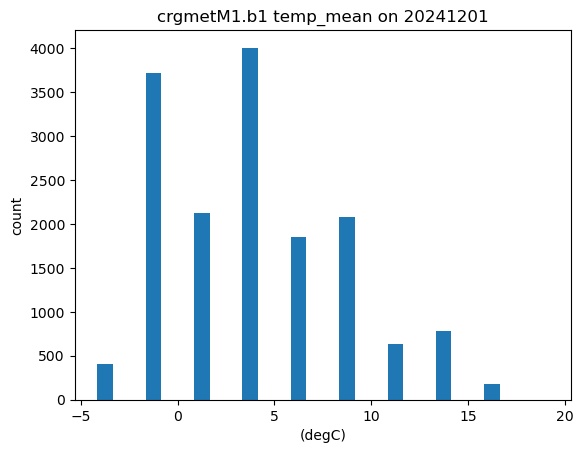

In [8]:
# First, let's plot up a histogram of the data
# All the ACT plotting is very similar to what we
# did earlier, first we create a display object
display = act.plotting.DistributionDisplay(ds_met)

# And then we can plot the data!  Note that we are passing a range into the
# histogram function to set the min/max range of the data
display.plot_stacked_bar('temp_mean', hist_kwargs={'range': [-5, 20]})
plt.show()

### Combined POPS and MET Scatter Plots

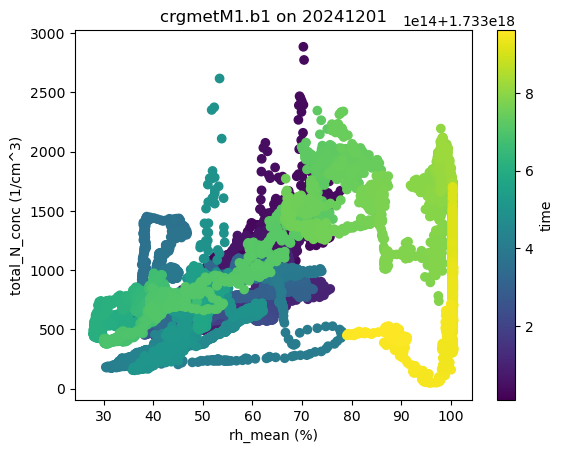

In [9]:
# First we need to combine data and to do that, we need to get it on the same time grid
ds_combined = xr.merge([ds_met.resample(time='1min').nearest(), ds_pops.resample(time='1min').nearest()], compat='override')


# Next up, let's do some scatter plots to compare some variables
# Scatter plots are also found in the DistributionDisplay module
display = act.plotting.DistributionDisplay(ds_combined)

# And then we can plot the data!
display.plot_scatter('rh_mean', 'total_N_conc', m_field='time')

plt.show()

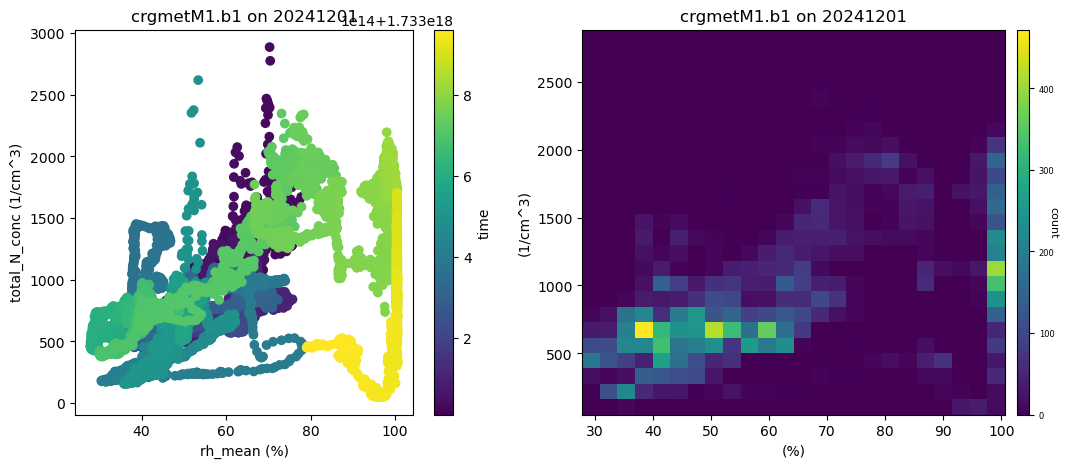

In [10]:
# Sometimes these scatter plots hide the number of points there actually
# are in some areas so let's try a heatmap as well
display = act.plotting.DistributionDisplay(ds_combined, figsize=(12, 5), subplot_shape=(1, 2))

# And then we can plot the data!
display.plot_scatter('rh_mean', 'total_N_conc', m_field='time', subplot_index=(0, 0))
# This can be used to adjust the axes limits
# display.set_xrng([0, 20], subplot_index=(0, 0))

# we can also pass in an array of values for the bins using np.arange(start, stop, step)
display.plot_heatmap('rh_mean', 'total_N_conc', subplot_index=(0, 1), x_bins=25, y_bins=25)
plt.show()

### Wind and Data Rose Plots

If your data may be wind speed or direction dependent, these plots can help inform where the influences may be coming from.  For this example, let's see if the total number concentration from the POPS is dependent on wind direction.  For reference, here's a link to a [google map of the site](https://www.google.com/maps/place/39%C2%B019'02.5%22N+76%C2%B035'12.3%22W/@39.317367,-76.58674,884m/data=!3m2!1e3!4b1!4m4!3m3!8m2!3d39.317367!4d-76.58674?entry=ttu&g_ep=EgoyMDI1MDYwOS4xIKXMDSoASAFQAw%3D%3D).

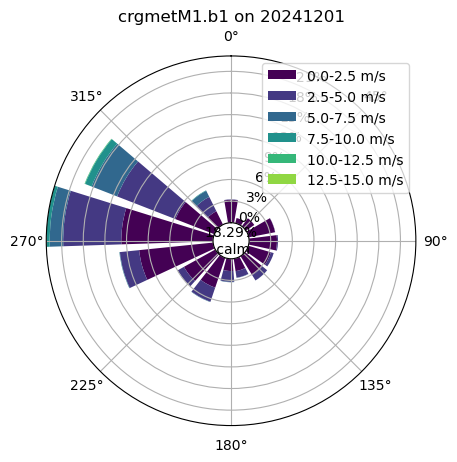

In [11]:
# Plot out the data rose using the WindRose display object
display = act.plotting.WindRoseDisplay(ds_combined)
display.plot('wdir_vec_mean', 'wspd_vec_mean', num_dirs=15, spd_bins=np.linspace(0, 15, 7))
plt.show()

/Users/atheisen/Code/ACT/act/plotting/windrosedisplay.py:358: RuntimeWarning: Mean of empty slice
  arr.append(np.nanmean(data[idx]))


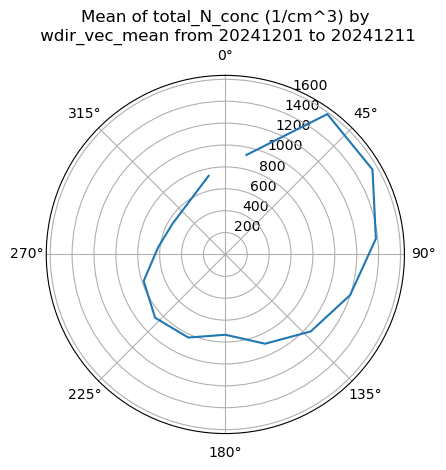

In [12]:
# Plot out the data rose using the WindRose display object
display = act.plotting.WindRoseDisplay(ds_combined)
display.plot_data('wdir_vec_mean', 'wspd_vec_mean', 'total_N_conc', num_dirs=15, plot_type='line', line_plot_calc='mean')
plt.show()

/Users/atheisen/Code/ACT/act/plotting/windrosedisplay.py:429: RuntimeWarning: Mean of empty slice
  mean_data[i, j] = np.nanmean(data[idx])


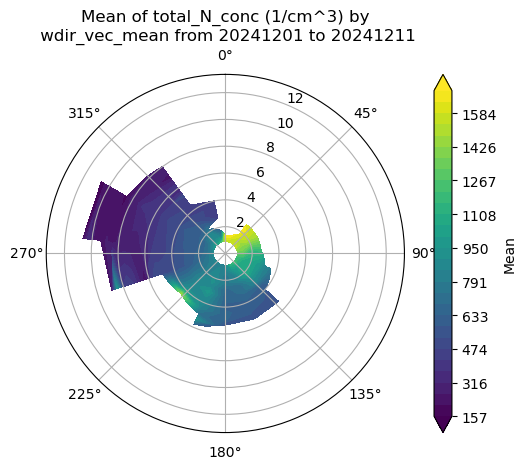

In [13]:
# Plot out the data rose using the WindRose display object
display = act.plotting.WindRoseDisplay(ds_combined)

# Let's try a different type of data rose type that is using contours amd the polar y axis is wind speed
# depending on wind direction and speed
display.plot_data('wdir_vec_mean', 'wspd_vec_mean', 'total_N_conc', num_dirs=15, plot_type='contour', contour_type='mean')
plt.show()

## Py-ART and KAZR Data
In this section, we'll take a look at how to calculate a cloud mask with KAZR data using Py-ART.  If you don't already have the imports and tokens for downloading data set from the above ACT section, please go back to the first 2 cells of code and run them.

In [14]:
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [15]:
# Set the datastream and start/enddates
# Set the datastream, download, and read in!
datastream = 'crgkazrcfrgeM1.a1'
startdate = '2024-12-11T22:00:00'
enddate = '2024-12-11T23:59:59'

result_kazr = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] crgkazrcfrgeM1.a1.20241211.230022.nc
[DOWNLOADING] crgkazrcfrgeM1.a1.20241211.220022.nc

If you use these data to prepare a publication, please cite:

Lindenmaier, I., Matthews, A., Wendler, T., Melo  de Castro, V., Deng, M.,
Rocque, M., & Feng, Y.-C. Ka ARM Zenith Radar (KAZRCFRGE), 2024-12-11 to
2024-12-11, ARM Mobile Facility (CRG), Baltimore, MD; AMF1 (main site for
CoURAGE) (M1). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1498936



### Let's plot up the data using Py-ART

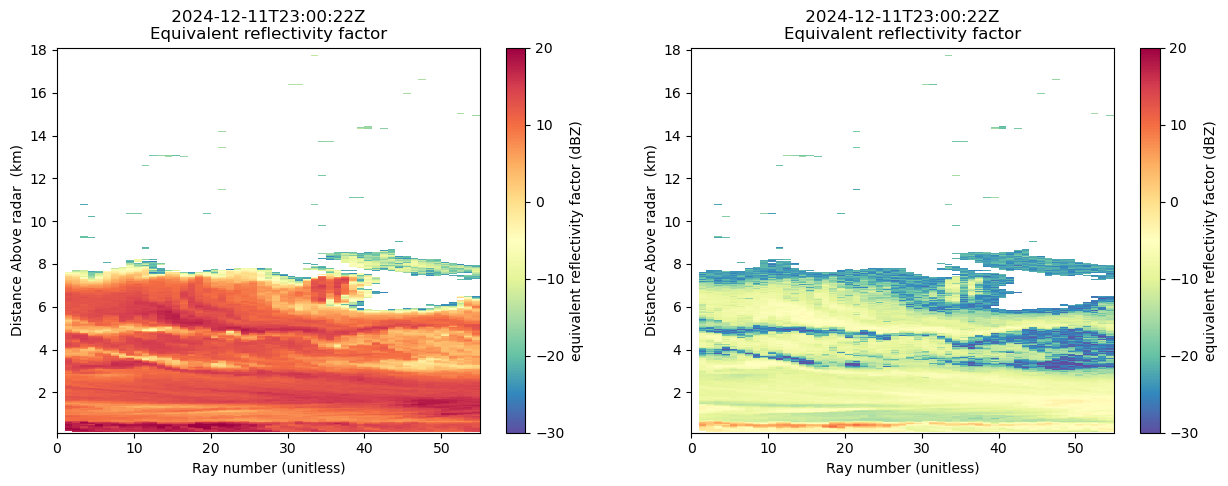

In [18]:
radar = pyart.aux_io.read_kazr(result_kazr[0])

# First lets correct the data by calculating the mask.
cloud_mask_radar = pyart.correct.calc_cloud_mask(radar, "reflectivity", "range")

# Next we'll create a copy of the reflectivity field so we are not
# overwriting the original data.
cloud_mask_radar.add_field_like(
    "reflectivity",
    "reflectivity_cloud_mask",
    cloud_mask_radar.fields["reflectivity"]["data"].copy(),
)

cloud_mask_radar.add_field_like(
    "reflectivity_crosspolar_v",
    "reflectivity_cross_cloud_mask",
    cloud_mask_radar.fields["reflectivity_crosspolar_v"]["data"].copy(),
)

# Now let's apply the mask to the copied reflectivity data.
cloud_mask_radar.fields["reflectivity_cloud_mask"]["data"][
    cloud_mask_radar.fields["cloud_mask_2"]["data"] == 0
] = np.nan

cloud_mask_radar.fields["reflectivity_cross_cloud_mask"]["data"][
    cloud_mask_radar.fields["cloud_mask_2"]["data"] == 0
] = np.nan

# And now we can plot the masked reflectivity field.
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
display = pyart.graph.RadarDisplay(cloud_mask_radar)
display.plot("reflectivity_cloud_mask", ax=ax1, vmin=-30, vmax=20)
display.set_limits(xlim=(0, 55))

ax2 = fig.add_subplot(122)
display.plot("reflectivity_cross_cloud_mask", ax=ax2, vmin=-30, vmax=20)
display.set_limits(xlim=(0, 55))

(0.0, 10000.0)

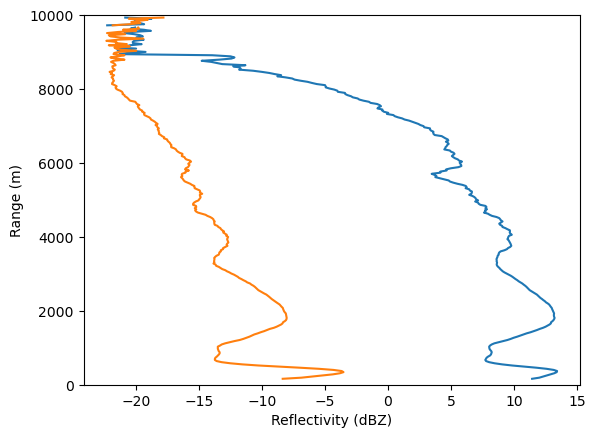

In [17]:
# Now let's calculate the mean profiles of the masked reflectivity and compare the co and cross-pol data
# Note, this can easily be done with the other modes of the KAZR by downloading the MD KAZR data
avg_prof = np.nanmean(cloud_mask_radar.fields['reflectivity_cloud_mask']['data'], axis=0)
avg_cross_prof = np.nanmean(cloud_mask_radar.fields['reflectivity_cross_cloud_mask']['data'], axis=0)
rng = cloud_mask_radar.range['data']

# Plot it out using regular Matplotlib commands
plt.plot(avg_prof, rng)
plt.plot(avg_cross_prof, rng)
plt.ylabel('Range (m)')
plt.xlabel('Reflectivity (dBZ)')
plt.ylim([0, 10000])

---

### Data Used in this Notebook
Petters, S., & Petters, M. portable or printed optical particle spectrometer (POPS1M), 2024-12-01 to 2024-12-11, ARM Mobile Facility (CRG), Baltimore, MD; AMF1 (main site for CoURAGE) (M1). Atmospheric Radiation Measurement (ARM) User Facility.

Kyrouac, J., Shi, Y., & Tuftedal, M. Surface Meteorological Instrumentation (MET), 2024-12-01 to 2024-12-11, ARM Mobile Facility (CRG), Baltimore, MD; AMF1 (main site for CoURAGE) (M1). Atmospheric Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1786358

Lindenmaier, I., Matthews, A., Wendler, T., Melo  de Castro, V., Deng, M., Rocque, M., & Feng, Y.-C. Ka ARM Zenith Radar (KAZRCFRGE), 2024-12-11 to 2024-12-11, ARM Mobile Facility (CRG), Baltimore, MD; AMF1 (main site for CoURAGE) (M1). Atmospheric Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1498936